# Leaf Classification

---

In [2]:
import tensorflow as tf
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [6]:
# getting filepaths
img_path = "/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images"

for dirpath, dirname, filename in os.walk(img_path):
    print(f"Path: {dirpath}\nNo. of directories: {len(dirname)}\nNo. of files: {len(filename)}\n\n")

Path: /content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images
No. of directories: 30
No. of files: 0


Path: /content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)
No. of directories: 0
No. of files: 65


Path: /content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Plectranthus Amboinicus (Mexican Mint)
No. of directories: 0
No. of files: 48


Path: /content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Santalum Album (Sandalwood)
No. of directories: 0
No. of files: 58


Path: /content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Pongamia Pinnata (Indian Beech)
No. of directories: 0
No. of files: 61


Path: /content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Syzygium Jambos (Rose Apple)
No. of directories: 0
No. of files: 56


Path: /content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Tabernaemontana Divaricata (Crape Jasmine)
No. of directories: 

In [7]:
# creating class name list
class_names = []

for dirname in os.listdir(img_path):
    class_names.append(dirname)

class_names

['Psidium Guajava (Guava)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Santalum Album (Sandalwood)',
 'Pongamia Pinnata (Indian Beech)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Syzygium Cumini (Jamun)',
 'Trigonella Foenum-graecum (Fenugreek)',
 'Piper Betle (Betel)',
 'Punica Granatum (Pomegranate)',
 'Mangifera Indica (Mango)',
 'Hibiscus Rosa-sinensis',
 'Mentha (Mint)',
 'Jasminum (Jasmine)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Moringa Oleifera (Drumstick)',
 'Nerium Oleander (Oleander)',
 'Murraya Koenigii (Curry)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Alpinia Galanga (Rasna)',
 'Ficus Auriculata (Roxburgh fig)',
 'Carissa Carandas (Karanda)',
 'Ficus Religiosa (Peepal Tree)',
 'Azadirachta Indica (Neem)',
 'Brassica Juncea (Indian Mustard)',
 'Basella Alba (Basale)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Citrus Limon (Lemon)']

In [ ]:
img_path_list = []
for dirpath in os.listdir(img_path):
    for dirpath2 in os.listdir(img_path + "/" +dirpath):

        img_path_list.append(img_path + "/" +dirpath + '/' + dirpath2)
img_path_list[:3], img_path_list[-5:]

(['/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-033.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-013.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-030.jpg'],
 ['/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-032.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-050.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-005.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-022.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-057.jpg'])

In [ ]:
len(img_path_list)

1845

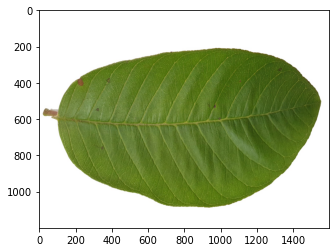

In [ ]:
plt.imshow(plt.imread(img_path_list[0]))

In [ ]:
img_path_list[:4]

['/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-033.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-013.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-030.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-019.jpg']

In [ ]:
class_names

['Psidium Guajava (Guava)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Santalum Album (Sandalwood)',
 'Pongamia Pinnata (Indian Beech)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Syzygium Cumini (Jamun)',
 'Trigonella Foenum-graecum (Fenugreek)',
 'Piper Betle (Betel)',
 'Punica Granatum (Pomegranate)',
 'Mangifera Indica (Mango)',
 'Hibiscus Rosa-sinensis',
 'Mentha (Mint)',
 'Jasminum (Jasmine)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Moringa Oleifera (Drumstick)',
 'Nerium Oleander (Oleander)',
 'Murraya Koenigii (Curry)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Alpinia Galanga (Rasna)',
 'Ficus Auriculata (Roxburgh fig)',
 'Carissa Carandas (Karanda)',
 'Ficus Religiosa (Peepal Tree)',
 'Azadirachta Indica (Neem)',
 'Brassica Juncea (Indian Mustard)',
 'Basella Alba (Basale)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Citrus Limon (Lemon)']

In [ ]:
img_path

'/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images'

In [ ]:
for path in os.listdir(img_path + "/" + class_names[0]):
  print(path)

PG-S-033.jpg
PG-S-013.jpg
PG-S-030.jpg
PG-S-019.jpg
PG-S-011.jpg
PG-S-017.jpg
PG-S-021.jpg
PG-S-023.jpg
PG-S-003.jpg
PG-S-028.jpg
PG-S-031.jpg
PG-S-029.jpg
PG-S-007.jpg
PG-S-010.jpg
PG-S-005.jpg
PG-S-020.jpg
PG-S-032.jpg
PG-S-014.jpg
PG-S-009.jpg
PG-S-001.jpg
PG-S-008.jpg
PG-S-035.jpg
PG-S-016.jpg
PG-S-006.jpg
PG-S-015.jpg
PG-S-026.jpg
PG-S-002.jpg
PG-S-012.jpg
PG-S-004.jpg
PG-S-025.jpg
PG-S-024.jpg
PG-S-027.jpg
PG-S-022.jpg
PG-S-018.jpg
PG-S-034.jpg
PG-S-060.jpg
PG-S-057.jpg
PG-S-049.jpg
PG-S-052.jpg
PG-S-065.jpg
PG-S-037.jpg
PG-S-041.jpg
PG-S-043.jpg
PG-S-051.jpg
PG-S-038.jpg
PG-S-036.jpg
PG-S-056.jpg
PG-S-064.jpg
PG-S-061.jpg
PG-S-040.jpg
PG-S-063.jpg
PG-S-062.jpg
PG-S-055.jpg
PG-S-059.jpg
PG-S-058.jpg
PG-S-039.jpg
PG-S-054.jpg
PG-S-045.jpg
PG-S-050.jpg
PG-S-053.jpg
PG-S-042.jpg
PG-S-047.jpg
PG-S-044.jpg
PG-S-046.jpg
PG-S-048.jpg


In [ ]:
dt = {}

for dir in os.listdir(img_path):
    dt[dir]=[img_path + "/" + dir + "/"+path for path in os.listdir(img_path + "/" + dir)]
        
len(dt[class_names[0]])

65

In [ ]:
len(dt.keys())

30

In [ ]:
dt[class_names[0]][:10]

['/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-033.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-013.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-030.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-019.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-011.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-017.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-021.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-023.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-00

In [ ]:
dt[class_names[-1]][:10]

['/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-023.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-025.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-055.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-045.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-044.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-015.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-048.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-007.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Citrus Limon (Lemon)/CL-S-012.jpg',
 '/content/drive/My

In [ ]:
img_path

'/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images'

In [ ]:
class_names

['Psidium Guajava (Guava)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Santalum Album (Sandalwood)',
 'Pongamia Pinnata (Indian Beech)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Syzygium Cumini (Jamun)',
 'Trigonella Foenum-graecum (Fenugreek)',
 'Piper Betle (Betel)',
 'Punica Granatum (Pomegranate)',
 'Mangifera Indica (Mango)',
 'Hibiscus Rosa-sinensis',
 'Mentha (Mint)',
 'Jasminum (Jasmine)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Moringa Oleifera (Drumstick)',
 'Nerium Oleander (Oleander)',
 'Murraya Koenigii (Curry)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Alpinia Galanga (Rasna)',
 'Ficus Auriculata (Roxburgh fig)',
 'Carissa Carandas (Karanda)',
 'Ficus Religiosa (Peepal Tree)',
 'Azadirachta Indica (Neem)',
 'Brassica Juncea (Indian Mustard)',
 'Basella Alba (Basale)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Citrus Limon (Lemon)']

In [ ]:
dt.keys()

dict_keys(['Psidium Guajava (Guava)', 'Plectranthus Amboinicus (Mexican Mint)', 'Santalum Album (Sandalwood)', 'Pongamia Pinnata (Indian Beech)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Syzygium Cumini (Jamun)', 'Trigonella Foenum-graecum (Fenugreek)', 'Piper Betle (Betel)', 'Punica Granatum (Pomegranate)', 'Mangifera Indica (Mango)', 'Hibiscus Rosa-sinensis', 'Mentha (Mint)', 'Jasminum (Jasmine)', 'Ocimum Tenuiflorum (Tulsi)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Nyctanthes Arbor-tristis (Parijata)', 'Moringa Oleifera (Drumstick)', 'Nerium Oleander (Oleander)', 'Murraya Koenigii (Curry)', 'Amaranthus Viridis (Arive-Dantu)', 'Alpinia Galanga (Rasna)', 'Ficus Auriculata (Roxburgh fig)', 'Carissa Carandas (Karanda)', 'Ficus Religiosa (Peepal Tree)', 'Azadirachta Indica (Neem)', 'Brassica Juncea (Indian Mustard)', 'Basella Alba (Basale)', 'Artocarpus Heterophyllus (Jackfruit)', 'Citrus Limon (Lemon)'])

In [ ]:
imgs = []
for values in dt.values():
  imgs.append(len(values))
imgs

[65,
 48,
 58,
 61,
 56,
 56,
 39,
 36,
 48,
 79,
 62,
 43,
 97,
 71,
 52,
 56,
 40,
 77,
 62,
 60,
 122,
 60,
 50,
 74,
 63,
 60,
 34,
 103,
 56,
 57]

In [ ]:
split_size = int(0.2*57)
split_size

11

In [ ]:
dt

{'Psidium Guajava (Guava)': ['/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-033.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-013.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-030.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-019.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-011.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-017.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-021.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Psidium Guajava (Guava)/PG-S-023.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Im

In [ ]:
# Splits the data to train and test
# import shutil
# for key, values in dt.items():
#   for leaf in values[:-split_size]:
#     #print("/content/drive/MyDrive/Colab Notebooks/Segmented Medicinal Leaf Images/Train/"+key)
#     os.makedirs("/content/drive/MyDrive/Colab Notebooks/Modified/Train/"+key, exist_ok=True)
#     shutil.copy(leaf, "/content/drive/MyDrive/Colab Notebooks/Modified/Train/"+key)
#     #print(leaf)
#   for leaf in values[-split_size:]:
#     os.makedirs("/content/drive/MyDrive/Colab Notebooks/Modified/Test/"+key, exist_ok=True)
#     shutil.copy(leaf, "/content/drive/MyDrive/Colab Notebooks/Modified/Test/"+key)

In [4]:
train_path = "/content/drive/MyDrive/Colab Notebooks/Modified/Train/"
test_path = "/content/drive/MyDrive/Colab Notebooks/Modified/Test/"

In [8]:
len(os.listdir(train_path)), len(os.listdir(train_path+class_names[0])), len(os.listdir(test_path+class_names[0]))

(30, 54, 11)

In [9]:
train_path, test_path

('/content/drive/MyDrive/Colab Notebooks/Modified/Train/',
 '/content/drive/MyDrive/Colab Notebooks/Modified/Test/')

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

In [11]:
train_dataset = image_dataset_from_directory(
    directory=train_path,
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42, 
)

test_dataset = image_dataset_from_directory(
    directory=test_path,
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
)

train_dataset, test_dataset

Found 1515 files belonging to 30 classes.
Found 330 files belonging to 30 classes.


(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [12]:
len(train_dataset.class_names), len(test_dataset.class_names)

(30, 30)

In [13]:
next(iter(train_dataset))[0].shape, next(iter(train_dataset))[1].shape

(TensorShape([32, 224, 224, 3]), TensorShape([32]))

In [14]:
len(train_dataset), len(test_dataset)

(48, 11)

In [15]:
len(class_names)

30

In [16]:
next(iter(train_dataset))[0][0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 25

In [17]:
next(iter(train_dataset))[1]

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([11,  8,  0, 18,  3,  8, 16,  7,  4, 20, 16, 15, 25,  6,  1, 22,  1,
        0, 11, 11, 14, 14, 13,  3, 10, 26,  9, 24, 22,  6,  2, 24],
      dtype=int32)>

In [18]:
img, label = next(iter(train_dataset))
img, label = img[0], label[0]

In [19]:
img.shape

TensorShape([224, 224, 3])

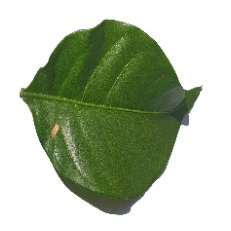

In [20]:
plt.imshow(img/255.)
plt.axis(False);

In [21]:
len(class_names)

30

In [22]:
# creating a CNN model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255.),

    tf.keras.layers.Conv2D(128, 2, activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    # flatten layer needs to be specified before a dense layer because it can't handle batched data
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

model_1_history = model_1.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
48/48 [==============================] - 486s 10s/step - loss: 2.6725 - accuracy: 0.2548 - val_loss: 2.0790 - val_accuracy: 0.4000
Epoch 2/20
48/48 [==============================] - 15s 276ms/step - loss: 1.0128 - accuracy: 0.6891 - val_loss: 1.2129 - val_accuracy: 0.6152
Epoch 3/20
48/48 [==============================] - 15s 284ms/step - loss: 0.4781 - accuracy: 0.8528 - val_loss: 1.0812 - val_accuracy: 0.6939
Epoch 4/20
48/48 [==============================] - 15s 281ms/step - loss: 0.2724 - accuracy: 0.9135 - val_loss: 1.3788 - val_accuracy: 0.6879
Epoch 5/20
48/48 [==============================] - 16s 278ms/step - loss: 0.1316 - accuracy: 0.9617 - val_loss: 1.1217 - val_accuracy: 0.7485
Epoch 6/20
48/48 [==============================] - 15s 280ms/step - loss: 0.0552 - accuracy: 0.9855 - val_loss: 1.1750 - val_accuracy: 0.7667
Epoch 7/20
48/48 [==============================] - 15s 279ms/step - loss: 0.0324 - accuracy: 0.9914 - val_loss: 1.2638 - val_accuracy: 0.7515


In [23]:
model_1.evaluate(test_dataset)

11/11 [==============================] - 3s 245ms/step - loss: 1.5787 - accuracy: 0.7667


[1.5787427425384521, 0.7666666507720947]

In [24]:
# unbatching the test data for labels
test_labels = []
for X, y in test_dataset.unbatch():
  test_labels.append(y.numpy())
test_labels[:5]

[0, 0, 0, 0, 0]

In [25]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
def calculate_metrics(model, dataset):
  """
  Calculates precision, recall and F1-score
  """
  pred_probs = model.predict(dataset)
  pred = pred_probs.argmax(axis=1)

  y = test_labels
    
  acc = accuracy_score(pred, y)
  pre, rec, fs, _ = precision_recall_fscore_support(pred, y, average="weighted")

  return {
      "accuracy": acc,
      "precision": pre,
      "recall": rec,
      "f1-score": fs
  }

In [26]:
def plot_loss_curves(model_history):
  """
  Plots the given model's loss and accuracy curves
  """
  model_history = model_history.history
  train_acc = model_history["accuracy"]
  train_loss = model_history["loss"]

  val_acc = model_history["val_accuracy"]
  val_loss = model_history["val_loss"]
  
  epochs = range(len(train_acc))
  
  plt.figure(figsize=(15, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, train_acc, label="Train_Accuracy")
  plt.plot(epochs, val_acc, label="Val_Accuracy")
  plt.title("Accuracy Curve")
  plt.xlabel("Epochs")
  plt.legend();
  
  plt.subplot(1, 2, 2)
  plt.plot(epochs, train_loss, label="Train_Loss")
  plt.plot(epochs, val_loss, label="Val_loss")
  plt.title("Loss Curve")
  plt.xlabel("Epochs")
  plt.legend()

  plt.suptitle("Loss and Accuracy Curves");

In [27]:
pred_probs = model_1.predict(test_dataset)
pred_probs

11/11 [==============================] - 2s 203ms/step


array([[1.0000000e+00, 2.3421671e-18, 1.2853983e-14, ..., 1.7472917e-08,
        5.8703603e-16, 8.7270570e-14],
       [9.9999976e-01, 1.4596141e-18, 2.5729200e-15, ..., 2.5501151e-10,
        2.1069347e-17, 2.1528970e-16],
       [1.0000000e+00, 1.0356244e-21, 2.9235167e-17, ..., 1.3462732e-08,
        1.5274339e-20, 4.1391725e-19],
       ...,
       [5.6802788e-21, 5.5700128e-12, 4.6480601e-29, ..., 5.6350851e-21,
        1.0420859e-17, 1.0000000e+00],
       [1.8019636e-11, 1.6612336e-08, 3.4887495e-13, ..., 4.5294102e-11,
        2.7986238e-10, 9.6615469e-01],
       [6.9104516e-16, 1.3187402e-11, 6.9792346e-21, ..., 4.9482945e-16,
        1.6039733e-14, 9.9999869e-01]], dtype=float32)

In [28]:
pred_probs.shape

(330, 30)

In [29]:
pred_probs.argmax(axis=1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  7,  7, 28,
        1,  1, 22,  1, 16,  2, 26, 26, 26,  2,  2, 26,  2,  2, 26,  2, 23,
        3,  3,  3, 16,  3,  3,  3,  3, 16, 12,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4, 13, 14, 12,  1,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  1,  6,  6, 16,  6,  7,  7, 25, 16,  7, 13,  7,  7,
       16,  7, 28,  8, 13, 23, 13,  4, 10,  8,  8,  8,  8,  4,  9,  9,  9,
        9,  9,  9,  9,  9,  9, 18,  9, 10, 10, 10, 10, 10, 10,  3, 10, 10,
       10, 10, 22, 11, 11, 11, 22, 23, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 13,  7, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 14, 14, 14, 14, 14, 13, 14, 14, 14, 14, 14, 24, 15, 15, 15, 23,
       15, 12, 24, 15, 15, 24, 16, 16, 19,  7,  1, 16, 28, 14, 16, 16, 15,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 18,
       18, 18, 18, 18, 18, 19, 19, 19,  3, 19, 23, 19,  4, 10, 10, 19, 11,
       20, 20, 20, 20, 20

In [30]:
model_1_results = calculate_metrics(model_1, test_dataset)
model_1_results

11/11 [==============================] - 2s 203ms/step


{'accuracy': 0.7666666666666667,
 'precision': 0.7944903581267218,
 'recall': 0.7666666666666667,
 'f1-score': 0.7683765939311548}

In [31]:
model_1.evaluate(test_dataset)

11/11 [==============================] - 2s 196ms/step - loss: 1.5787 - accuracy: 0.7667


[1.5787427425384521, 0.7666666507720947]

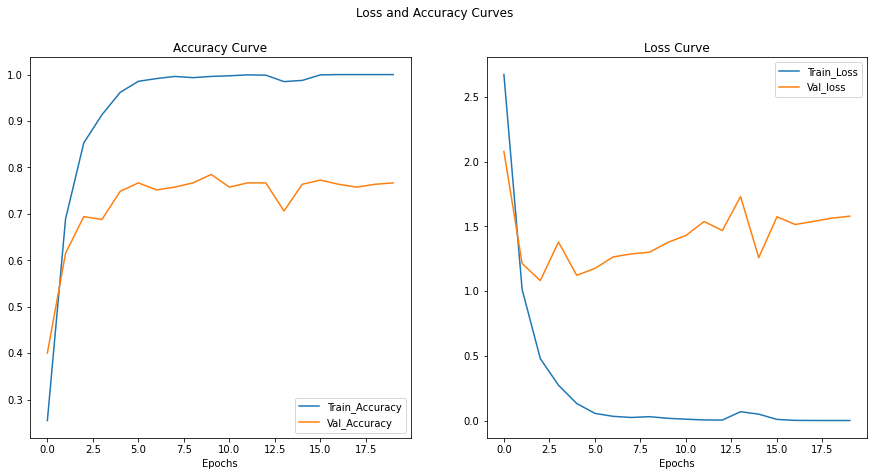

In [32]:
plot_loss_curves(model_1_history)

In [66]:
eff_net_layer = tf.keras.applications.EfficientNetV2B0(include_top=False)
eff_net_layer.trainable=False

input = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = eff_net_layer(input, training=False)
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(len(class_names), activation="softmax")(x)

model_2 = tf.keras.Model(input, output)

model_2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

model_2_history = model_2.fit(train_dataset, epochs=10, validation_data=test_dataset)

24274472/24274472 [==============================] - 2s 0us/step
Epoch 1/10
48/48 [==============================] - 25s 302ms/step - loss: 2.3527 - accuracy: 0.7723 - val_loss: 0.5510 - val_accuracy: 0.9424
Epoch 2/10
48/48 [==============================] - 16s 292ms/step - loss: 0.1490 - accuracy: 0.9670 - val_loss: 0.4487 - val_accuracy: 0.9515
Epoch 3/10
48/48 [==============================] - 15s 276ms/step - loss: 0.1001 - accuracy: 0.9868 - val_loss: 0.3629 - val_accuracy: 0.9515
Epoch 4/10
48/48 [==============================] - 16s 305ms/step - loss: 0.0962 - accuracy: 0.9875 - val_loss: 0.5730 - val_accuracy: 0.9455
Epoch 5/10
48/48 [==============================] - 15s 283ms/step - loss: 0.0649 - accuracy: 0.9908 - val_loss: 0.5927 - val_accuracy: 0.9424
Epoch 6/10
48/48 [==============================] - 17s 295ms/step - loss: 0.0796 - accuracy: 0.9901 - val_loss: 0.2961 - val_accuracy: 0.9697
Epoch 7/10
48/48 [==============================] - 15s 277ms/step - loss: 0.

In [67]:
eff_net_layer.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_3 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_1 (Normalization  (None, None, None,   0          ['rescaling_3[0][0]']            
 )                              3)                                                

In [68]:
pred_probs_2 = model_2.predict(test_dataset)
pred_probs_2.shape

11/11 [==============================] - 6s 296ms/step


(330, 30)

In [69]:
model_2_results = calculate_metrics(model_2, test_dataset)
model_2_results

11/11 [==============================] - 2s 214ms/step


{'accuracy': 0.9606060606060606,
 'precision': 0.9641873278236914,
 'recall': 0.9606060606060606,
 'f1-score': 0.9605204843465713}

In [70]:
model_2.evaluate(test_dataset)

11/11 [==============================] - 2s 206ms/step - loss: 0.2960 - accuracy: 0.9606


[0.29603272676467896, 0.960606038570404]

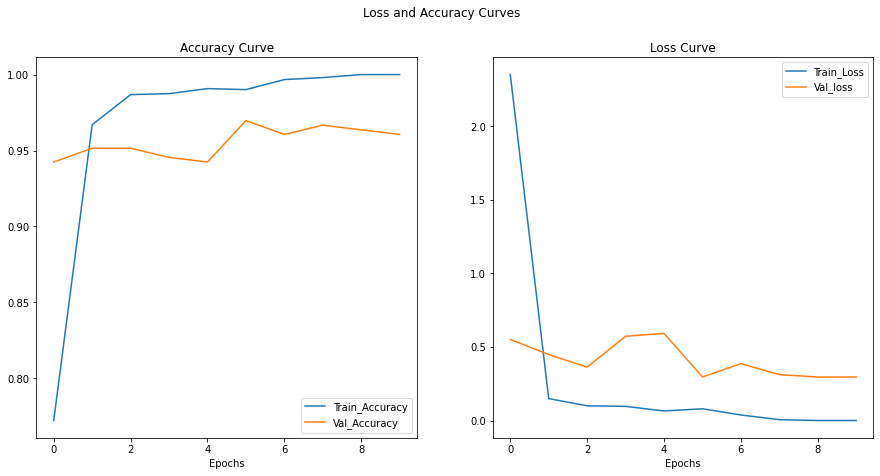

In [71]:
plot_loss_curves(model_2_history)

In [72]:
# Results dataframe
results = pd.DataFrame(data=[model_1_results, model_2_results], index=["model_1_Conv2D", "model_2_effnet"])
results

,accuracy,precision,recall,f1-score
model_1_Conv2D,0.766667,0.794490,0.766667,0.768377
model_2_effnet,0.960606,0.964187,0.960606,0.960520


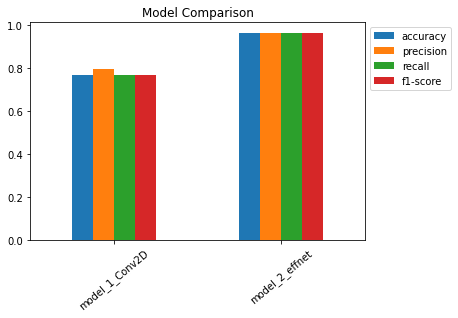

In [73]:
results.plot.bar()
plt.xticks(rotation=40)
plt.title("Model Comparison")
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [74]:
# saving the results
results.to_csv("/content/drive/MyDrive/Colab Notebooks/Leaf classification results.csv")

In [75]:
class_names = test_dataset.class_names
class_names

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [76]:
def custom_prediction(img_path, model, label):
  """
  Makes prediction on given image
  """
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=(224, 224))

  pred_probs = model.predict(tf.expand_dims(img, axis=0))
  pred = pred_probs.argmax(axis=1)[0]
  pred_prob_max = max(pred_probs)*100
  plt.imshow(img/255.)
  plt.axis(False);

  if label:
    plt.suptitle(f"Actual: {label.upper()}", c="g")

    if label == class_names[pred]:
      plt.title(f"Pred: {class_names[pred]} | Prob: {max(pred_prob_max):.2f}", c="g")
    else:
      plt.title(f"Pred: {class_names[pred]} | Prob: {max(pred_prob_max):.2f}", c="r")
    return
  plt.title(f"Pred: {class_names[pred]} | Prob: {max(pred_prob_max):.2f}")

1/1 [==============================] - 0s 62ms/step


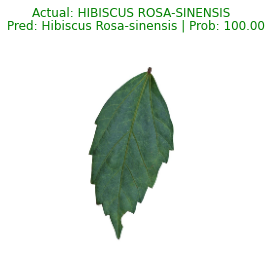

In [61]:
custom_img_path = "/content/drive/MyDrive/Colab Notebooks/Modified/Test/Hibiscus Rosa-sinensis/HR-S-014.jpg"
custom_prediction(img_path=custom_img_path, model=model_2, label="Hibiscus Rosa-sinensis")

1/1 [==============================] - 0s 53ms/step


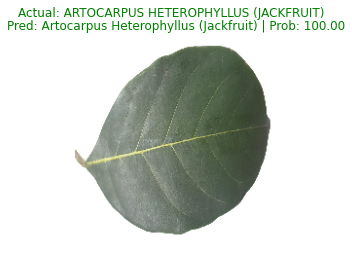

In [62]:
custom_img_path = "/content/drive/MyDrive/Colab Notebooks/Modified/Test/Artocarpus Heterophyllus (Jackfruit)/AH-S-019.jpg"
custom_prediction(img_path=custom_img_path, model=model_2, label="Artocarpus Heterophyllus (Jackfruit)")

In [77]:
# saving model_2
model_2.save(filepath="/content/drive/MyDrive/Colab Notebooks/model_2_effnet.h5")

In [78]:
# loading the saved model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model_2_effnet.h5")
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 30)                1881630   
                                                                 
Total params: 7,800,942
Trainable params: 1,881,630
Non-trainable params: 5,919,312
_________________________________________________________________


In [82]:
%%writefile /content/app.py

import streamlit as st
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# All the plant species in the trained dataset
labels = ['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']
	
# Function to predict the species of the plant based on the trained model and input image
def prediction(img_path, model):
	# Image pre-processing 
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size=(224, 224))
    img = tf.expand_dims(img, axis=0)

    pred_probs = model.predict(img)
    pred_class = pred_probs.argmax(axis=1).item()
    pred_class = labels[pred_class]
    pred_prob = pred_probs.max(axis=1)[0]*100
    return pred_class, pred_prob


def main():
    st.title("Leaf Classifier")
    image_file = st.file_uploader("Upload the Image...")
    if (st.button("Predict")):
        if image_file is not None:
            c1, c2 = st.columns([1,5])
            with c1:
                img = Image.open(image_file)
                st.image(img, caption="Uploaded Image", width=100)
            with c2:
                with open(image_file.name, "wb") as f:
                    f.write(image_file.getbuffer())
                st.write("Classifying...")
                model = tf.keras.models.load_model("model_2_effnet.h5", compile=False)
                pred_class, pred_prob = prediction(image_file.name, model)
                if(pred_prob<0.5):
                    st.info("Low accuracy warning!")
                    st.success(f"Prediction: {pred_class.capitalize()}\n\nProbability: {pred_prob:.2f}%")
                else:
                    st.success(f"Prediction: {pred_class.capitalize()}\n\nProbability: {pred_prob:.2f}%")
        else:
            st.write(""" Please upload an image. """)

if __name__=='__main__': 
	main()

Writing /content/app.py
